In [1]:
# module 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import copy

In [2]:
plt.rcParams["figure.figsize"] = (14,8)

In [105]:
# dataset 로딩
x_train_load = pd.read_csv('C://Users//zeus_//Desktop//champion_data//train/train_activity_final_v2.csv').sort_values(by='acc_id', ascending=True)
y_train_load = pd.read_csv('C://Users//zeus_//Desktop//champion_data//train/train_label.csv').sort_values(by='acc_id', ascending=True)
x_test_load = pd.read_csv('C://Users//zeus_//Desktop//champion_data//test/test_activity_final_v2.csv').sort_values(by='acc_id', ascending=True)

## 중요 피처 뽑는 함수
- input: data_columns, feature_importances, num
- output: list
---

In [106]:
def select_important_feautre(columns, feature_importance, num):
    
    #딕셔너리
    dic = {}
    for value in [list(v) for v in zip(columns, feature_importance)]:
        dic[value[1]] = value[0] 
        
    sorted_list = sorted(dic)
    sorted_list.reverse()
    
    i = 0
    result = []
    for y in sorted_list:
        result.append(dic[y])
        i = i+1
        if(i == num):
            break
    
    return result

## 데이터 로드
---

In [1]:
x_data = x_train_load#.drop(["Unnamed: 0"], axis=1)
y_data = y_train_load.label
x_test = x_test_load

NameError: name 'x_train_load' is not defined

## 피처만들기!
---
---
---

In [108]:
#길드 참여횟수 대비 채팅횟수
x_data['guild_chat_by_cnt'] = x_data.guild_chat_8 / (x_data.guild_cnt + 0.0001)
x_test['guild_chat_by_cnt'] = x_test.guild_chat_8 / (x_test.guild_cnt + 0.0001)

In [109]:
#파티 참여횟수 대비 채팅횟수
x_data['party_chat_by_cnt'] = x_data.party_chat_8 / (x_data.party_cnt + 0.0001)
x_test['party_chat_by_cnt'] = x_test.party_chat_8 / (x_test.party_cnt + 0.0001)

In [110]:
#아이템 구매 비율
temp = ['goomae_accessory', 'goomae_costume', 'goomae_gem', 'goomae_grocery', 'goomae_money', 'goomae_weapon']

for v in temp:
    x_data['rate_cnt_' + v] = x_data['cnt_' + v] / (x_data['cnt_goomae_total'] + 0.0001)
    x_test['rate_cnt_' + v] = x_test['cnt_' + v] / (x_test['cnt_goomae_total'] + 0.0001)

In [111]:
#아이템 구매량 비율
temp = ['goomae_accessory', 'goomae_costume', 'goomae_gem', 'goomae_grocery', 'goomae_money', 'goomae_weapon']

for v in temp:
    x_data['rate_amt_' + v] = x_data['amt_' + v] / (x_data['amt_goomae_total'] + 0.0001)
    x_test['rate_amt_' + v] = x_test['amt_' + v] / (x_test['amt_goomae_total'] + 0.0001)

In [112]:
#아이템 판매 비율
temp = ['panmae_accessory', 'panmae_costume', 'panmae_gem', 'panmae_grocery', 'panmae_money', 'panmae_weapon']

for v in temp:
    x_data['rate_cnt_' + v] = x_data['cnt_' + v] / (x_data['cnt_panmae_total'] + 0.0001)
    x_test['rate_cnt_' + v] = x_test['cnt_' + v] / (x_test['cnt_panmae_total'] + 0.0001)

In [113]:
#아이템 판매량 비율
temp = ['panmae_accessory', 'panmae_costume', 'panmae_gem', 'panmae_grocery', 'panmae_money', 'panmae_weapon']

for v in temp:
    x_data['rate_amt_' + v] = x_data['amt_' + v] / (x_data['amt_panmae_total'] + 0.0001)
    x_test['rate_amt_' + v] = x_test['amt_' + v] / (x_test['amt_panmae_total'] + 0.0001)

In [114]:
#현질 대 구매 비율
x_data['goomae_by_payment'] = 0.0001
x_test['goomae_by_payment'] = 0.0001

for i in range(1, 9):
    x_data['goomae_by_payment'] += x_data['payment_amount_' + str(i)]
    x_test['goomae_by_payment'] += x_test['payment_amount_' + str(i)]

x_data['goomae_by_payment'] = x_data['cnt_goomae_money']/x_data['goomae_by_payment']
x_test['goomae_by_payment'] = x_test['cnt_goomae_money']/x_test['goomae_by_payment']

In [115]:
#8주차 돈 획득량 대비 돈 판매비율
x_data['get_money_8_to_money_panmae'] = x_data['amt_panmae_money'] / (x_data.get_money_8 + 0.00001)
x_test['get_money_8_to_money_panmae'] = x_test['amt_panmae_money'] / (x_test.get_money_8 + 0.00001)

In [116]:
#play time 8 대비 cnt dt 8
x_data['cnt_dt_8_by_play_time_8'] = x_data['cnt_dt_8'] / (x_data.play_time_8 + 0.00001)
x_test['cnt_dt_8_by_play_time_8'] = x_test['cnt_dt_8'] / (x_test.play_time_8 + 0.00001)

In [117]:
#play time # 대비 play time 8
for i in range(1, 8):
    x_data['play_time_8_by_play_time_' + str(i)] = x_data.play_time_8 / (x_data['play_time_' + str(i)] + 0.00001)
    x_test['play_time_8_by_play_time_' + str(i)] = x_test.play_time_8 / (x_test['play_time_' + str(i)] + 0.00001)

In [118]:
#play time 8 대미 sum exp 8
x_data['play_time_8_by_sum_exp_8'] = x_data.play_time_8 / (x_data.sum_exp_8 + 0.00001)
x_test['play_time_8_by_sum_exp_8'] = x_test.play_time_8 / (x_test.sum_exp_8 + 0.00001)

In [119]:
#play time 8 대미 sum exp 8
x_data['cnt_dt_8_by_sum_exp_8'] = x_data.cnt_dt_8 / (x_data.sum_exp_8 + 0.00001)
x_test['cnt_dt_8_by_sum_exp_8'] = x_test.cnt_dt_8 / (x_test.sum_exp_8 + 0.00001)

In [120]:
#cnt dt 대비 game combat time 8
x_data['game_combat_time_8_by_cnt_dt_8'] = x_data.game_combat_time_8 / (x_data['cnt_dt_8'] + 0.00001)
x_test['game_combat_time_8_by_cnt_dt_8'] = x_test.game_combat_time_8 / (x_test['cnt_dt_8'] + 0.00001)

# 합치기
---

In [124]:
kmeans_train = pd.read_csv('C://Users//zeus_//Desktop//champion_data/kmeans/train_cate_kmeas.csv').sort_values(by='acc_id', ascending=True)
mean_train = pd.read_csv('C://Users//zeus_//Desktop//champion_data/basic/train_cate_mean.csv').sort_values(by='acc_id', ascending=True)
median_train = pd.read_csv('C://Users//zeus_//Desktop//champion_data/basic/train_cate_median.csv').sort_values(by='acc_id', ascending=True)
quantile_train =  pd.read_csv('C://Users//zeus_//Desktop//champion_data/basic/train_cate_quantile.csv').sort_values(by='acc_id', ascending=True)
mon2mon = pd.read_csv('C://Users//zeus_//Desktop//champion_data/mon2mon/feature_30_train.csv')

In [121]:
kmeans_test = pd.read_csv('C://Users//zeus_//Desktop//champion_data/kmeans/test_cate_kmeas.csv').sort_values(by='acc_id', ascending=True)
mean_test = pd.read_csv('C://Users//zeus_//Desktop//champion_data/basic/test_cate_mean.csv').sort_values(by='acc_id', ascending=True)
median_test = pd.read_csv('C://Users//zeus_//Desktop//champion_data/basic/test_cate_median.csv').sort_values(by='acc_id', ascending=True)
quantile_test =  pd.read_csv('C://Users//zeus_//Desktop//champion_data/basic/test_cate_quantile.csv').sort_values(by='acc_id', ascending=True)
mon2mon_test = pd.read_csv('C://Users//zeus_//Desktop//champion_data/mon2mon/feature_30_test.csv')

In [131]:
kmeans_train = kmeans_train.drop(['Unnamed: 0', 'label'], axis=1)
mean_train = mean_train.drop(['Unnamed: 0'], axis=1)
median_train = median_train.drop(['Unnamed: 0'], axis=1)
quantile_train = quantile_train.drop(['Unnamed: 0'], axis=1)

In [133]:
kmeans_test = kmeans_test.drop(['Unnamed: 0'], axis=1)
mean_test = mean_test.drop(['Unnamed: 0'], axis=1)
median_test = median_test.drop(['Unnamed: 0'], axis=1)
quantile_test = quantile_test.drop(['Unnamed: 0'], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [134]:
x_data = pd.merge(x_data, kmeans_train, how='left', on='acc_id')
x_test = pd.merge(x_test, kmeans_test, how='left', on='acc_id')

In [135]:
x_data = pd.merge(x_data, mean_train, how='left', on='acc_id')
x_test = pd.merge(x_test, mean_test, how='left', on='acc_id')

In [136]:
x_data = pd.merge(x_data, median_train, how='left', on='acc_id')
x_test = pd.merge(x_test, median_test, how='left', on='acc_id')

In [137]:
x_data = pd.merge(x_data, quantile_train, how='left', on='acc_id')
x_test = pd.merge(x_test, quantile_test, how='left', on='acc_id')

In [138]:
x_data = pd.concat([x_data, mon2mon.drop(['Unnamed: 0'], axis = 1)], axis= 1)
x_test = pd.concat([x_test, mon2mon_test.drop(['Unnamed: 0'], axis = 1)], axis= 1)

In [151]:
x_data = x_data.loc[:, result_feature[-1].insert(0, 'acc_id')]
x_test = x_test.loc[:, result_feature[-1].insert(0, 'acc_id')]

In [153]:
x_data.to_csv('C:/Users/zeus_/Desktop/champion_data/train/train_activity_final_v3.csv')
x_test.to_csv('C:/Users/zeus_/Desktop/champion_data/test/test_activity_final_v3.csv')

### acc_id 제거

In [66]:
x_data = x_data.drop(['acc_id'], axis=1)
x_test = x_test.drop(['acc_id'], axis=1)

In [69]:
x_data = x_data.loc[:,result_feature[-1]]

# 트레이닝셋, 테스트 셋 구분
---

In [70]:
x_train, x_test2, y_train, y_test2 = train_test_split(x_data, y_data, test_size=0.1, random_state=200)

---
# 모델 - 전체
---

In [27]:
logit = 0
result = [0]
result_feature = []

In [43]:
len(result_feature)

9

In [28]:
print("start ! ")
forest = RandomForestClassifier(n_estimators=100, random_state=24, n_jobs=3, max_depth=25)

for i in range(0, 3153):
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=200)
    
    forest.fit(x_train,y_train)
    
    if np.mean(f1_score(y_test, forest.predict(x_test), average=None)) > result[logit]:
        result.append(np.mean(f1_score(y_test, forest.predict(x_test), average=None)))
        logit = logit + 1
        print("{} ==> {}".format(3154-i, np.mean(f1_score(y_test, forest.predict(x_test), average=None))))
        result_feature.append(x_data.columns)
                                  
    if i % 20 == 0:
        print(result)
                              
    x_data = x_data.loc[:,select_important_feautre(x_data.columns, forest.feature_importances_, 3153-i)]

start ! 
3154 ==> 0.7385347527037658
[0, 0.7385347527037658]
3149 ==> 0.7402213601372565
3147 ==> 0.7403529400197417
3135 ==> 0.7413979902348429
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429]
3053 ==> 0.7414377883500649
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.741437788

[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0

[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0

[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0.7414377883500649, 0.7416203571213904, 0.741951914285624, 0.7426742283313534, 0.7430577516946644]
[0, 0.7385347527037658, 0.7402213601372565, 0.7403529400197417, 0.7413979902348429, 0

In [71]:
forest = RandomForestClassifier(n_estimators=100, random_state=24, n_jobs=3, max_depth=25)

In [72]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [73]:
print(classification_report(y_test2, forest.predict(x_test2)))

             precision    recall  f1-score   support

     2month       0.66      0.67      0.67      2551
      month       0.69      0.56      0.62      2466
   retained       0.77      0.85      0.81      2454
       week       0.84      0.91      0.87      2529

avg / total       0.74      0.75      0.74     10000



In [74]:
np.mean(f1_score(y_test2, forest.predict(x_test2), average=None))

0.7430577516946644

In [44]:
x_data = x_data.loc[:,select_important_feautre(x_data.columns, forest.feature_importances_, 500)]

In [94]:
x_data.to_csv('C://Users//zeus_//Desktop//t.csv')

## 테스트

In [59]:
acc_id = x_test_load.acc_id.values

In [60]:
result = forest.predict(x_test)

In [61]:
data = {'acc_id':acc_id, 'label':result}

In [62]:
df = pd.DataFrame(data)
df.index = df.acc_id
df = df.drop(['acc_id'], axis = 1)

In [63]:
df.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\51_result.csv')

---
# MODEL 1
---

In [75]:
y_data_layer1 = y_train.map(lambda value: "MON" if value == "month" or value == "2month" else value)

In [76]:
x_train_layer1, x_test_layer1, y_train_layer1, y_test_layer1 = train_test_split(x_train, y_data_layer1, test_size=0.1, random_state=1)

In [77]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, max_depth=32, criterion='entropy')

In [78]:
forest1.fit(x_train_layer1, y_train_layer1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
print("테스트 세트 정확도: {:.3f}".format(forest1.score(x_test_layer1, y_test_layer1)))

테스트 세트 정확도: 0.853


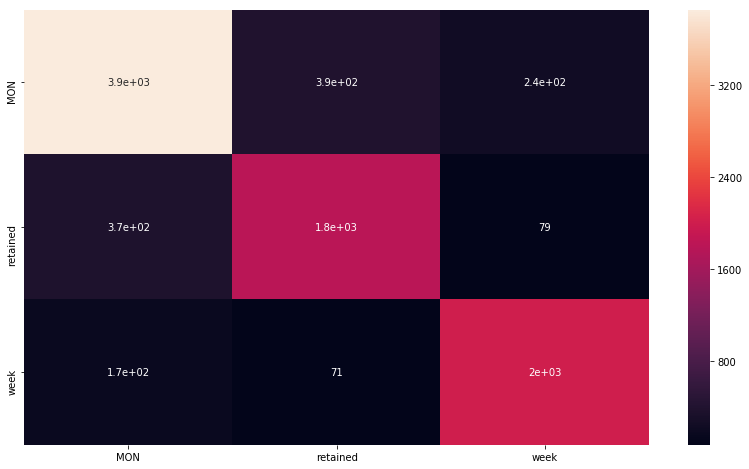

In [80]:
cm = pd.DataFrame(confusion_matrix(y_test_layer1, forest1.predict(x_test_layer1)), columns=forest1.classes_, index=forest1.classes_)
sns.heatmap(cm, annot=True)

In [81]:
print(classification_report(y_test_layer1, forest1.predict(x_test_layer1)))

             precision    recall  f1-score   support

        MON       0.88      0.86      0.87      4487
   retained       0.80      0.80      0.80      2251
       week       0.86      0.89      0.88      2262

avg / total       0.85      0.85      0.85      9000



# MODEL 2

In [82]:
custom_filter = [v[0] or v[1] for v in zip(list((y_train == 'month').values), list((y_train == '2month').values))]
x_data_layer2 = x_train[custom_filter]
y_data_layer2 = y_train[custom_filter]

In [83]:
x_train_layer2, x_test_layer2, y_train_layer2, y_test_layer2 = train_test_split(x_data_layer2, y_data_layer2, test_size=0.1, random_state=1)

In [84]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1, max_depth=26, min_samples_split=10)

In [85]:
forest2.fit(x_train_layer2, y_train_layer2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [86]:
print("테스트 세트 정확도: {:.3f}".format(forest2.score(x_test_layer2, y_test_layer2)))

테스트 세트 정확도: 0.731


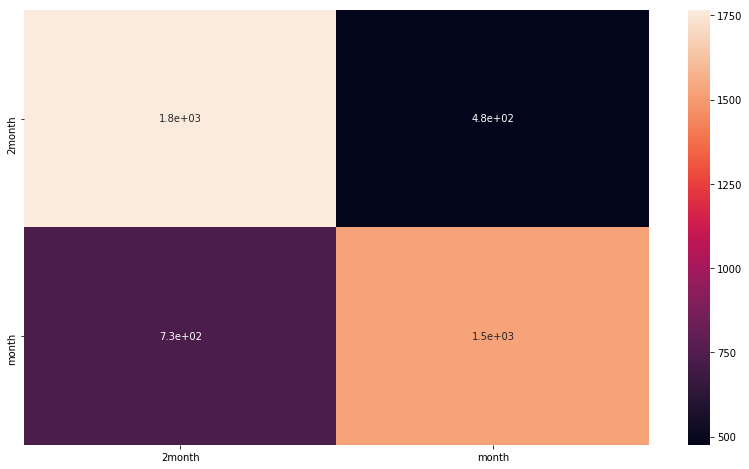

In [87]:
cm = pd.DataFrame(confusion_matrix(y_test_layer2, forest2.predict(x_test_layer2)), columns=forest2.classes_, index=forest2.classes_)
sns.heatmap(cm, annot=True)

In [88]:
print(classification_report(y_test_layer2, forest2.predict(x_test_layer2)))

             precision    recall  f1-score   support

     2month       0.71      0.79      0.75      2242
      month       0.76      0.68      0.72      2257

avg / total       0.73      0.73      0.73      4499

